# Statistics Assignment

Assignment: 
    
    Using Height.csv dataset that contains height of 1M people of a country estimate the average height of the population using
    CLT and build a 95% confidence interval.Use a programming language of your preference
    - Know the skewness of the population. 
    - Estimate the average height of the population. 
    - Take sample
    - Calculate mean
    - Plot those means
    - Calculate CI approx 95%

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

#to avoid unnecessary warnings
import warnings
warnings.filterwarnings('ignore')


# Analyzing the data

In [2]:
#reading the csv file
df=pd.read_csv("Height.csv")

#displaying data from file
df.head()

,Unnamed: 0,Height
0,0,150.208946
1,1,186.638011
2,2,164.396523
3,3,130.020481
4,4,158.344730


<AxesSubplot:xlabel='Height', ylabel='Density'>

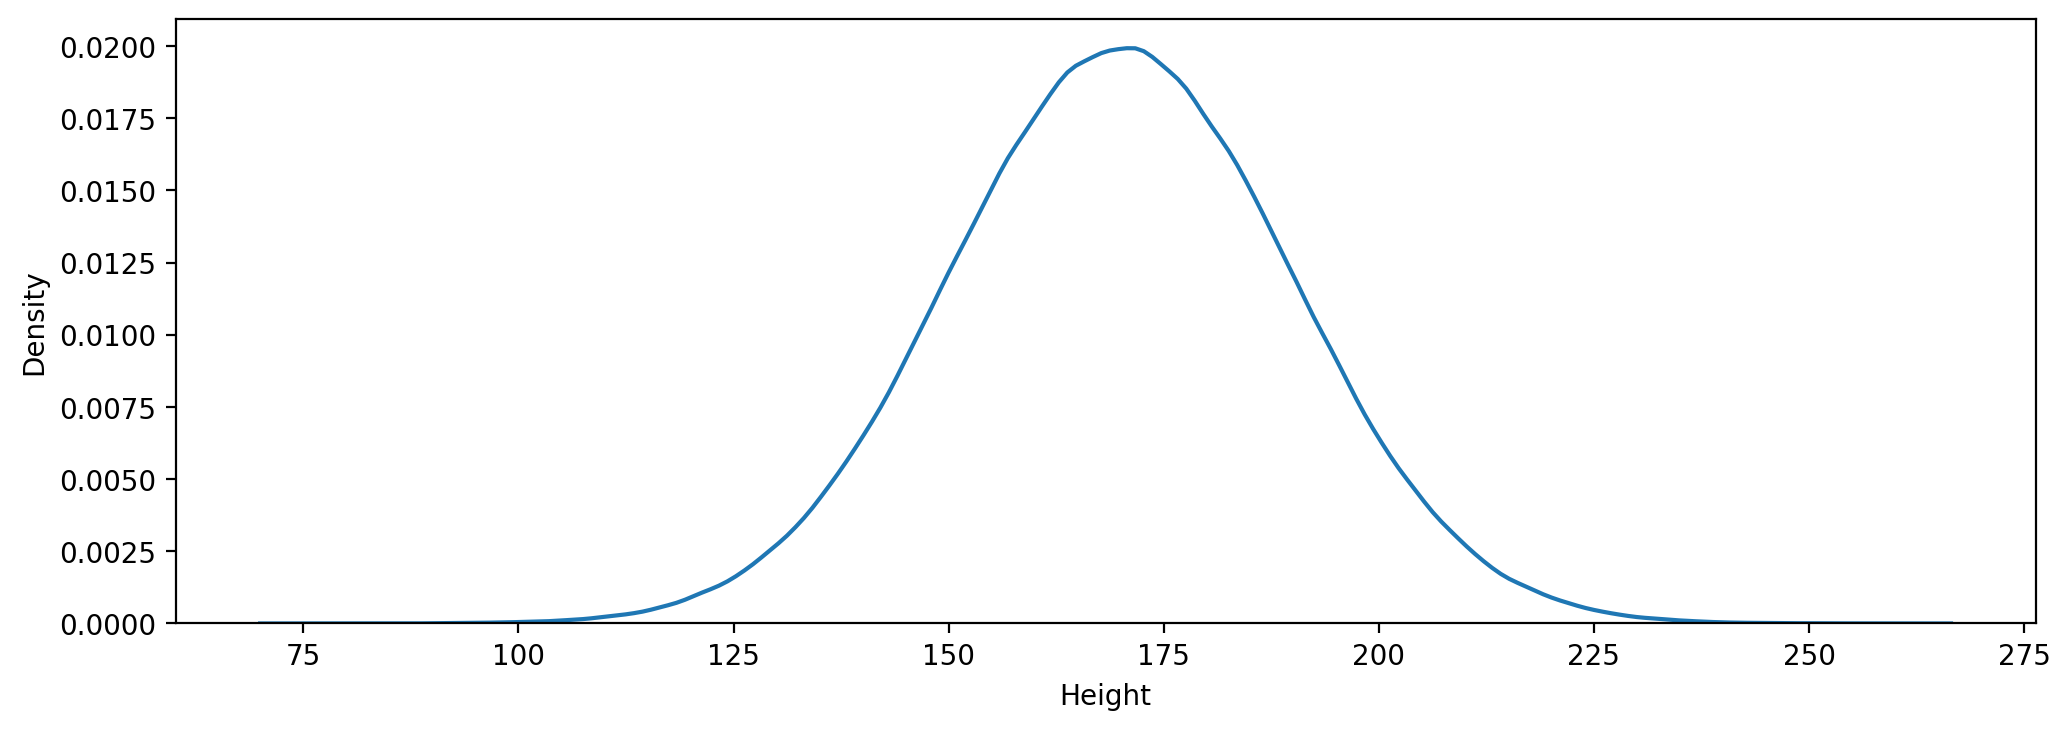

In [3]:
#plotting a displot to check skewness of data
plt.figure(figsize=(12,4), dpi=200)
sns.distplot(df['Height'],hist=False)

<AxesSubplot:xlabel='Height', ylabel='Density'>

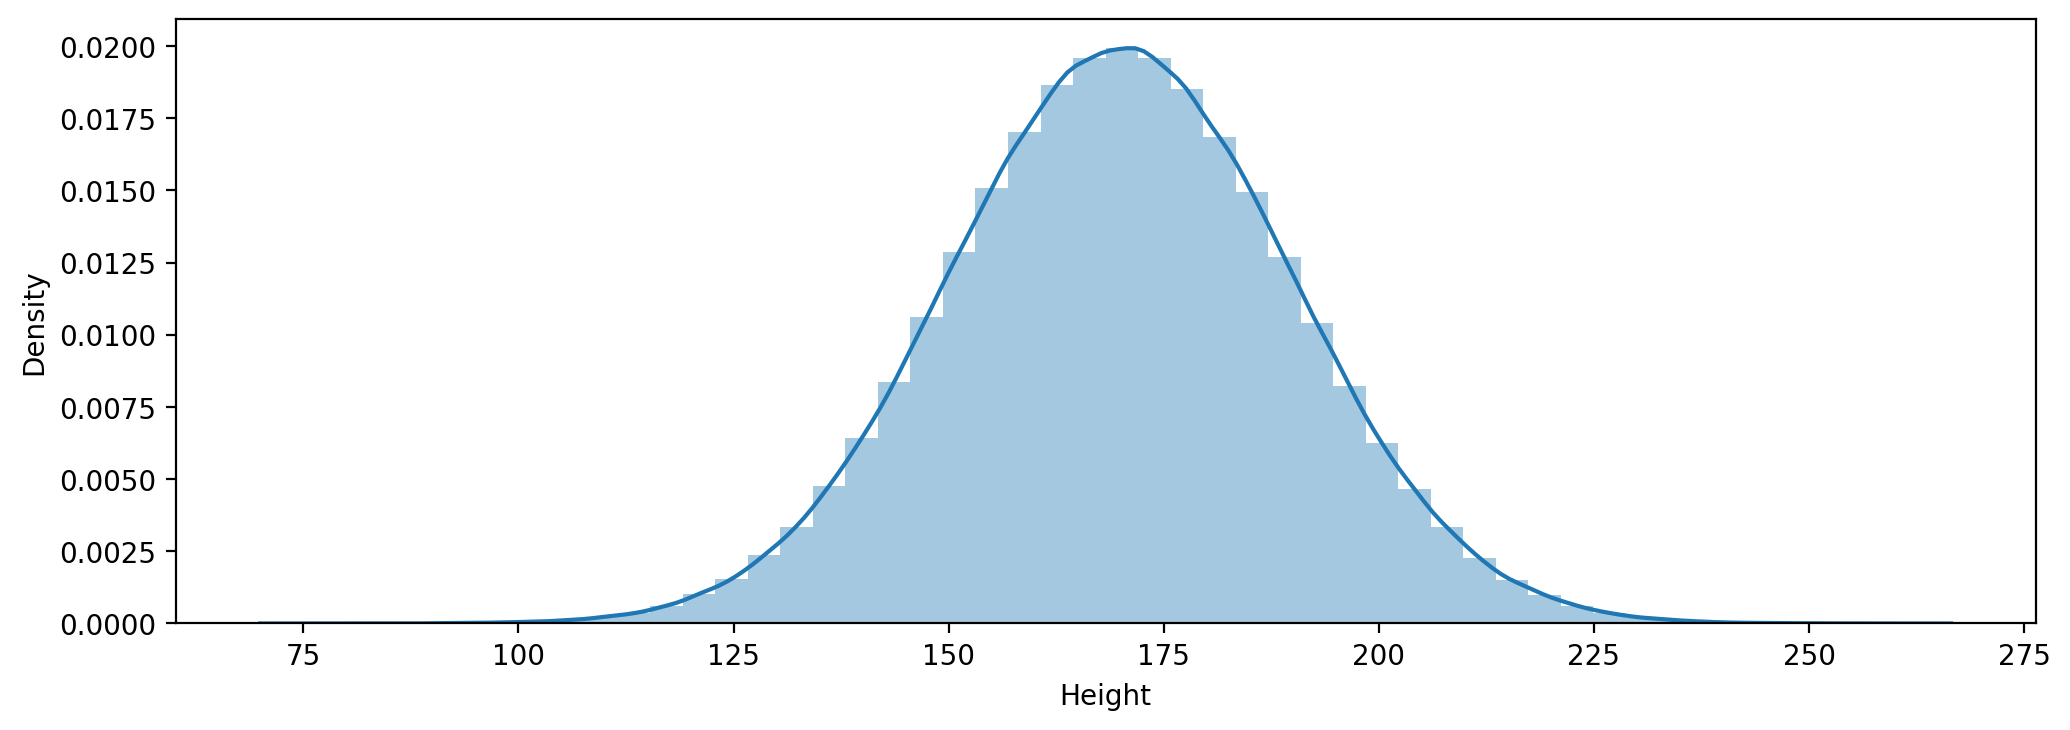

In [4]:
#distplot with histogram
plt.figure(figsize=(12,4), dpi=200)
sns.distplot(df['Height'])

# Data is normally distributed

In [5]:
#calculating mean
print("Mean Height  :",df.Height.mean())

Mean Height  : 169.99311420321786


In [6]:
#Calculating Standard Deviation
print("Standard deviation :",df.Height.std())

Standard deviation : 19.989201304374493


In [7]:
#For Central limit Theorem Sample must be large enough i.e. n>30
Sample_size=50

df.Height.sample(Sample_size).mean()

170.8876214977647

In [8]:
#creating 1000 samples and calculating their means
rs = []
for i in range(1000):
    rs.append(np.random.choice(df.Height,Sample_size))

#printing the samples
print(rs)    

#calculating means of our samples
sample_mean=[]
for i in range(len(rs)):
     sample_mean.append(rs[i].mean())
print(sample_mean)    

#Sorting mean values in series using pandas
sample_mean=pd.Series(sample_mean)

#Verifying total number of samples collected
print("Number of the samples collected :",len(sample_mean))

[array([192.30202415, 218.73161581, 160.3153002 , 220.04047878,
       165.87813926, 166.11424027, 128.1669745 , 141.06592308,
       192.57398974, 181.11132727, 184.36198315, 157.86275495,
       185.90266696, 152.86712551, 175.09425145, 148.48752704,
       219.26770503, 164.61087107, 176.09012089, 170.65632295,
       147.98268013, 155.68869518, 159.86496299, 176.90127646,
       171.66146021, 152.72851427, 151.96293114, 171.6621218 ,
       162.61439101, 171.91069469, 174.70725307, 133.99280187,
       179.40534741, 206.34599299, 173.70614798, 160.16643708,
       146.0440031 , 185.84297343, 198.17338121, 170.64320237,
       170.00783482, 175.94427445, 149.87628653, 160.42102491,
       207.90123733, 190.08450869, 191.63616453, 192.7806719 ,
       184.0569336 , 151.98755177]), array([192.56833926, 173.20339741, 175.45856094, 182.30816033,
       147.3634881 , 170.30432808, 163.34810107, 176.84329271,
       187.64341032, 149.14506564, 193.8376429 , 182.31378079,
       180.114105

<AxesSubplot:ylabel='Density'>

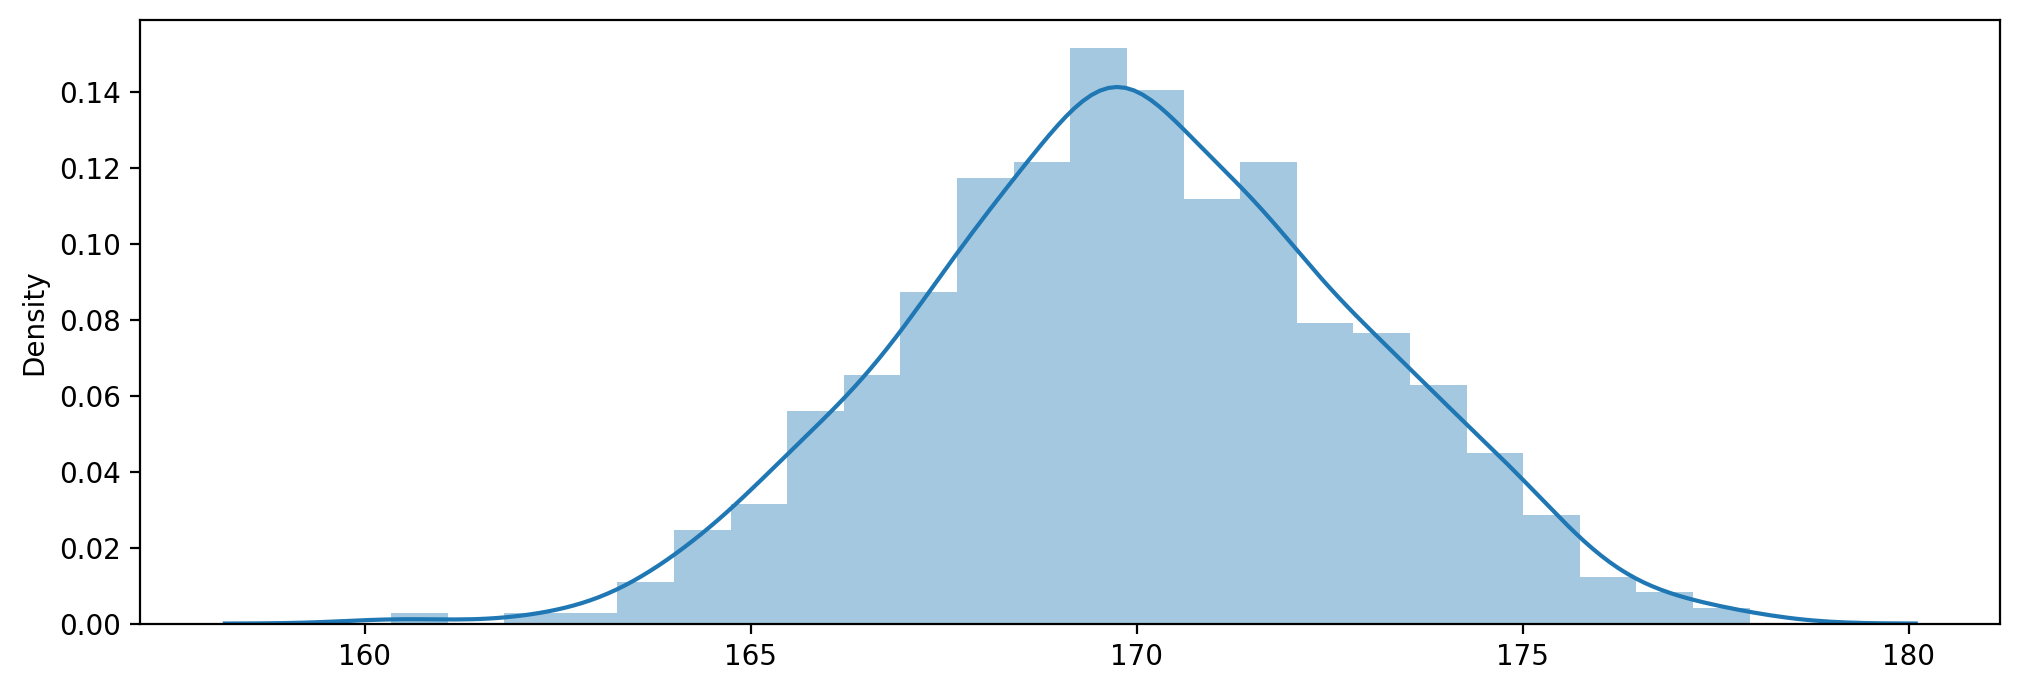

In [9]:
#plotting the means
plt.figure(figsize=(12,4),dpi=200)
sns.distplot(sample_mean)

In [10]:
# mean value of all 1000 sample(Sampling distribution)
print("Sampleing mean :",sample_mean.mean())

#Std deviation of all 1000 sample
print("Standard deviation:",sample_mean.std())

Sampleing mean : 169.99829476823277
Standard deviation: 2.854992885625594


In [11]:
#Calculating standard error
print("Standard error :",df.Height.std()/np.sqrt(Sample_size))

Standard error : 2.826899958565237


# ==========================================================

# Confidence Interval

In [12]:
# Standardization 
df_new = (df-df.mean())/df.std()
print(df_new)

        Unnamed: 0    Height
0        -1.732048 -0.989743
1        -1.732045  0.832694
2        -1.732041 -0.279981
3        -1.732038 -1.999711
4        -1.732034 -0.582734
...            ...       ...
999995    1.732034  1.196999
999996    1.732038  0.484789
999997    1.732041  0.209536
999998    1.732045  0.223974
999999    1.732048  1.034128

[1000000 rows x 2 columns]


<AxesSubplot:xlabel='Height', ylabel='Density'>

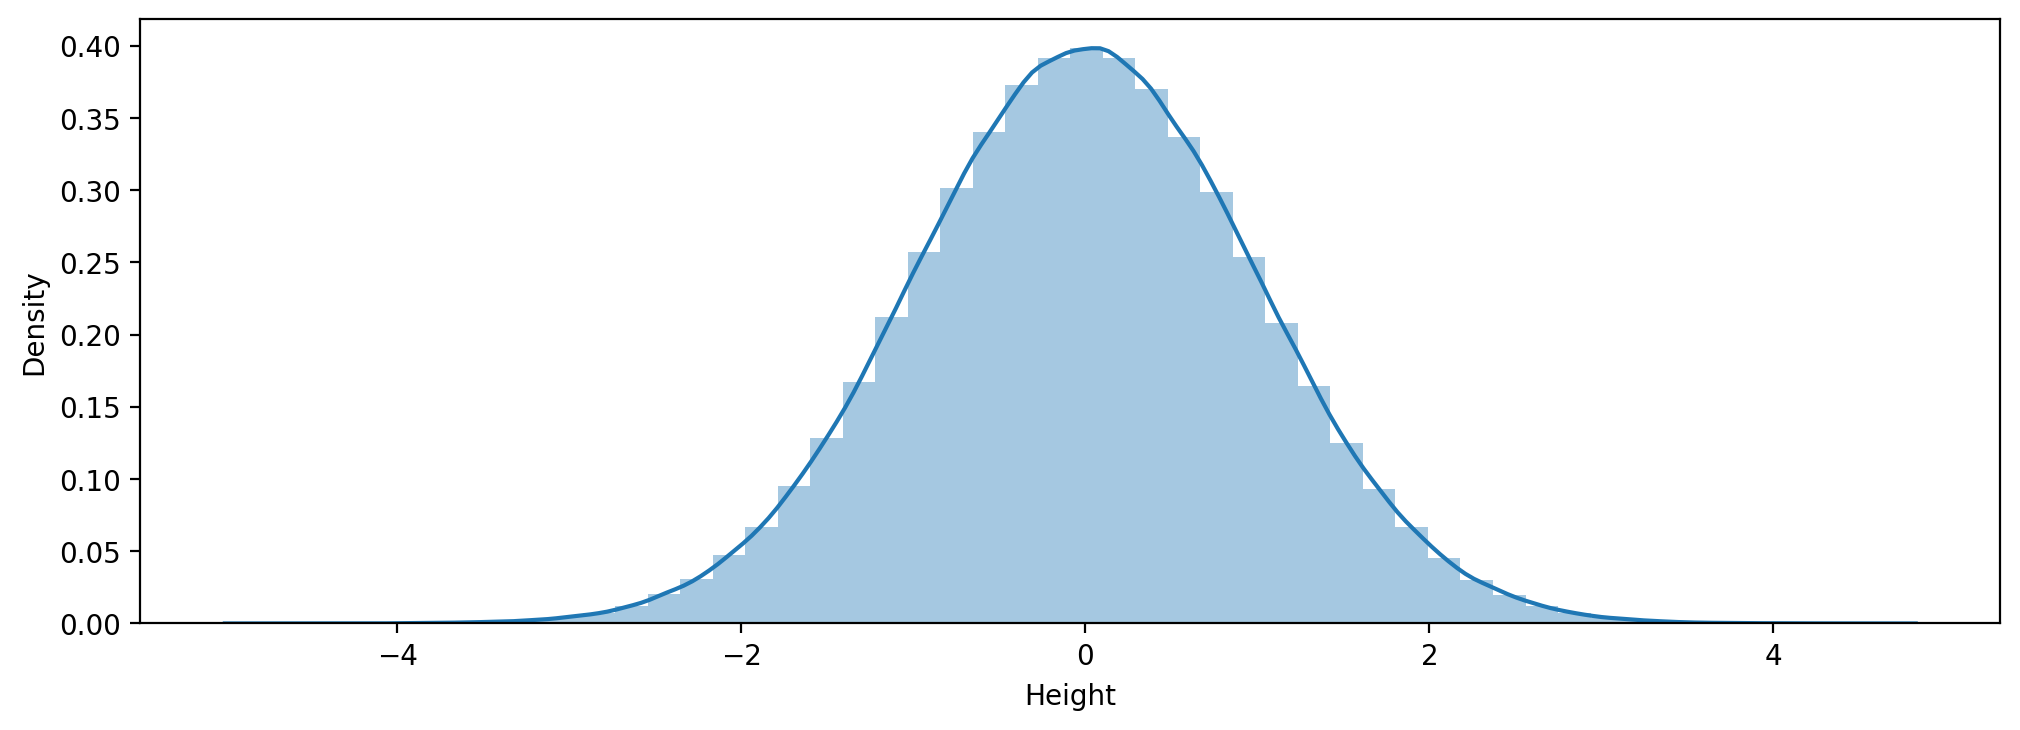

In [13]:
plt.figure(figsize=(12,4),dpi=200)
sns.distplot(df_new.Height)

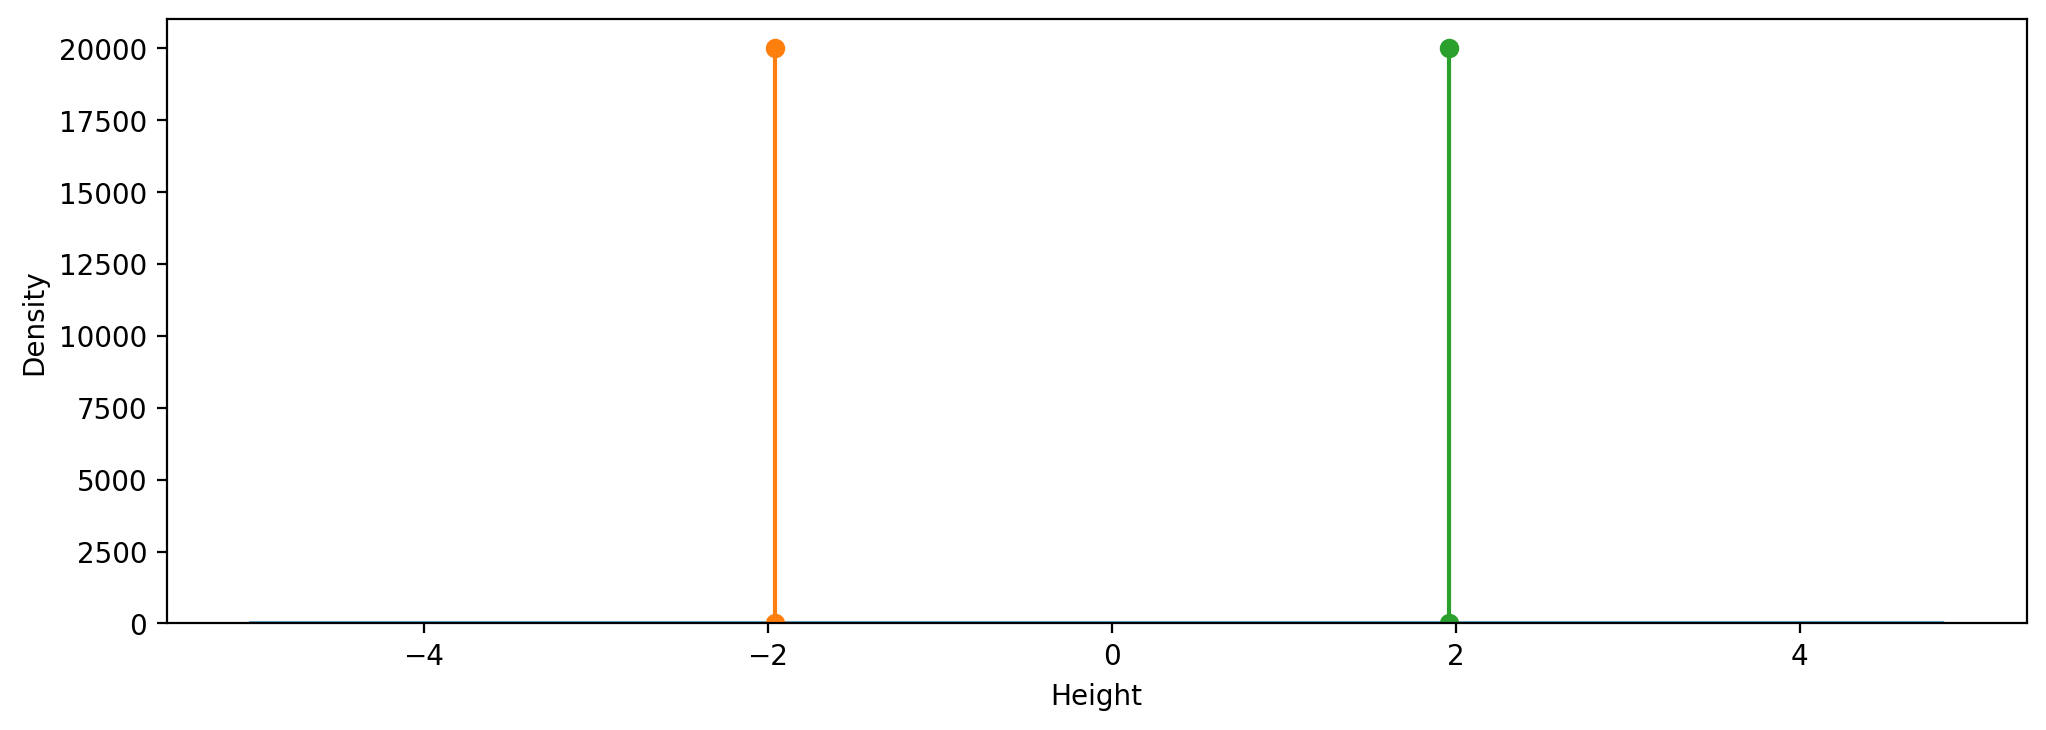

In [29]:
#Plotting the Confidence Interval
plt.figure(figsize=(12,4),dpi=200)
sns.distplot(df_new.Height)
# confidence interval left line
one_x12, one_y12 = [np.std(df_new.Height, axis=0) * -1.96, np.std(df_new.Height, axis=0) * -1.96], [0, 20000]
# confidence interval right line
two_x12, two_y12 = [np.std(df_new.Height, axis=0) * 1.96, np.std(df_new.Height, axis=0) * 1.96], [0, 20000]

plt.plot(one_x12, one_y12, two_x12, two_y12, marker = 'o')